In [1]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [2]:
# Get ready
dir_apo_vol = "/home/pbarletta/labo/20/cph_obp/run/apo/cavidad"

nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

21

In [6]:
for i in 1:12
    PH = convert(Int64, phs[i] * 10)
#     global vol_apo_idx = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_vol, string(idx[i]),
#             string("vol_trj_apo_", idx[i])))[:, 3])
    global vol_apo_phs = convert(Array{Float64, 1}, readdlm(joinpath(dir_apo_vol, string(phs[i]),
            string("vol_trj_apo_", phs[i])))[:, 3])

#     sym_vol_trj_apo_idx = Symbol("vol_trj_apo_", idx[i])
    sym_vol_trj_apo_phs = Symbol("vol_trj_apo_", PH)
#     eval(:($sym_vol_trj_apo_idx = vol_apo_idx))
    eval(:($sym_vol_trj_apo_phs = vol_apo_phs))
end

## vol por pH

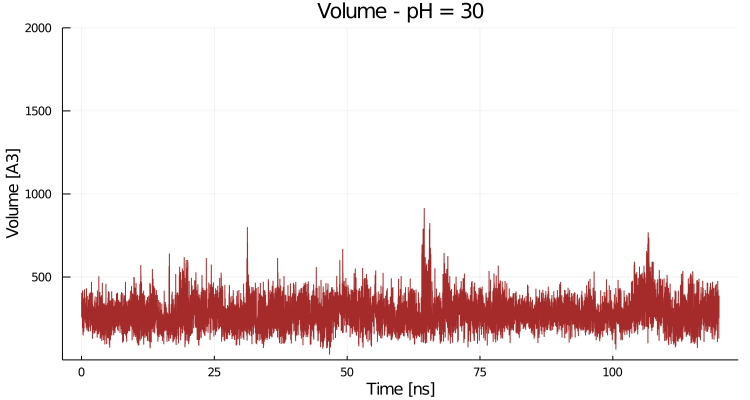

In [7]:
plot(collect(1:nstlim) ./ 100, vol_trj_apo_30,
    title = string("Volume - pH = ", 30), size = (750, 400),
    ylims = (1, 2000), label = false,
    linecolor = Colors.colorant"Brown",
    yaxis = "Volume [A3]", xaxis = "Time [ns]")

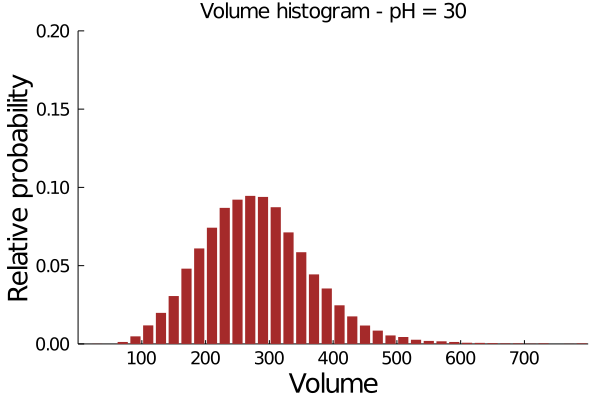

In [8]:
max_vol = 2000
st = 20
bin_vol = collect(0:st:max_vol)
wgh_vol = fill(1.0, length(vol_trj_apo_30))

# Histograma ponderado
Wbins_vol, Whis_vol = JUMD.weightedHist(vol_trj_apo_30, bin_vol, wgh_vol, true, false);

bar(Wbins_vol, Whis_vol,
    xlims = (0, 800), ylims = (0, .2),
    xticks = 100:100:700,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Volume histogram - pH = ", 30), yaxis = "Relative probability", xaxis = "Volume")

In [52]:
vals = vcat([ mean(vol_trj_apo_30) std(vol_trj_apo_30) std(vol_trj_apo_30) / mean(vol_trj_apo_30) ],
    [ mean(vol_trj_apo_35) std(vol_trj_apo_35) std(vol_trj_apo_35) / mean(vol_trj_apo_35) ],
    [ mean(vol_trj_apo_40) std(vol_trj_apo_40) std(vol_trj_apo_40) / mean(vol_trj_apo_40) ])
    
NamedArray(vals, (string.(phs[1:3]), ["μ" ; "std" ; "μ/std"]))

3×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
30    │  338.942   164.051   0.48401
35    │  342.883   180.079  0.525189
40    │  334.351   170.828  0.510925

## vol por idx

plot(collect(1:nstlim) ./ 100, vol_trj_apo_1,
    title = string("Volume - idx = ", 1), size = (750, 400),
    ylims = (1, 2000), label = false,
    linecolor = Colors.colorant"CornflowerBlue",
    yaxis = "Volume [A3]", xaxis = "Time [ns]")

max_vol = 2000
st = 20
bin_vol = collect(0:st:max_vol)
wgh_vol = fill(1.0, length(vol_trj_apo_1))

# Histograma ponderado
Wbins_vol, Whis_vol = JUMD.weightedHist(vol_trj_apo_1, bin_vol, wgh_vol, true, false);

bar(Wbins_vol, Whis_vol,
    xlims = (0, 800), ylims = (0, .2),
    xticks = 100:100:700,
    linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Volume histogram - idx = ", 1), yaxis = "Relative probability", xaxis = "Volume")

NamedArray([ mean(vol_trj_apo_1) std(vol_trj_apo_1) std(vol_trj_apo_1) / mean(vol_trj_apo_1) ],
    (["Volume"], ["μ" ; "std" ; "μ/std"]))